In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Carga de datos

In [2]:
bd_Ventas = pd.read_excel('BaseDatos.xlsx',sheet_name= 1)
bd_Inventario = pd.read_excel('BaseDatos.xlsx',sheet_name= 2)
bd_Catalogo = pd.read_excel('BaseDatos.xlsx',sheet_name= 3)
bd_Ventas.index = bd_Ventas.FECHA

In [3]:
ganancia = np.round(bd_Catalogo.Precio.values-bd_Catalogo.Costo.values,2)
costo = bd_Catalogo.Costo.values
vida = bd_Catalogo.TiempoVidaAnaquel.values

In [4]:
with open('ganancia.pickle', 'wb') as pkl:
    pickle.dump(ganancia, pkl)
with open('costo.pickle', 'wb') as pkl:
    pickle.dump(costo, pkl)
with open('vida.pickle', 'wb') as pkl:
    pickle.dump(vida, pkl)

In [5]:
bd_Ventas.head(4)

,SKU,LOC,FECHA,UNI
FECHA,,,,
2019-04-01,Art02,LOC_001,2019-04-01,1
2019-04-01,Art04,LOC_001,2019-04-01,1
2019-04-01,Art04,LOC_002,2019-04-01,1
2019-04-01,Art06,LOC_002,2019-04-01,1


In [6]:
bd_Catalogo.head(4)

,Articulo,Precio,Costo,TiempoVidaAnaquel,Tamaño_Surtido
0,Art01,7.77,5.44,14,1
1,Art02,25.67,15.40,10,3
2,Art03,27.23,17.70,12,2
3,Art04,20.49,10.25,7,1


In [7]:
bd_Inventario.head(4)

,SKU,LOC,INVENTARIO_23_06_2019 FINAL DIA,Unnamed: 3,* Todo este inventario fue surtido el lunes 17 de Junio
0,Art04,LOC_001,10,NaN,NaN
1,Art01,LOC_001,10,NaN,NaN
2,Art02,LOC_001,5,NaN,NaN
3,Art06,LOC_001,5,NaN,NaN


# Analisis exploratorio

## Inventario

<Axes: >

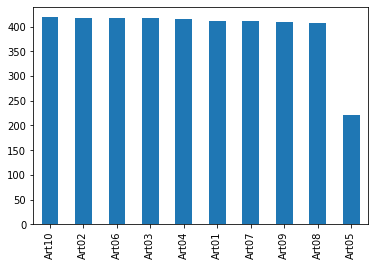

In [ ]:
bd_Inventario.SKU.value_counts(sort=True).plot(kind='bar')

In [ ]:
prod_x_tienda = bd_Inventario.LOC.value_counts(sort=True)

<Axes: >

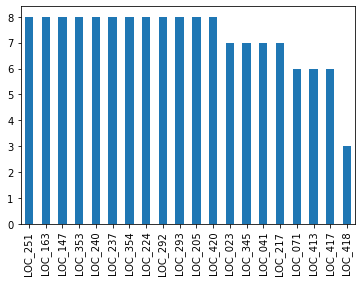

In [ ]:
prod_x_tienda[prod_x_tienda<=8].plot(kind='bar')

<ipython-input-27-ab3ac57f79a1>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  bd_Ventas.FECHA.dt.week.value_counts().plot(kind='bar')


<Axes: >

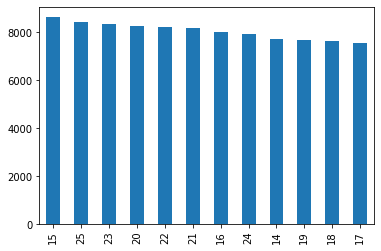

In [ ]:
bd_Ventas.FECHA.dt.week.value_counts().plot(kind='bar')
#bd_Ventas.groupby([bd_Ventas.index.day_of_week]).size().plot(kind='barh')

## Ventas

<Axes: xlabel='FECHA'>

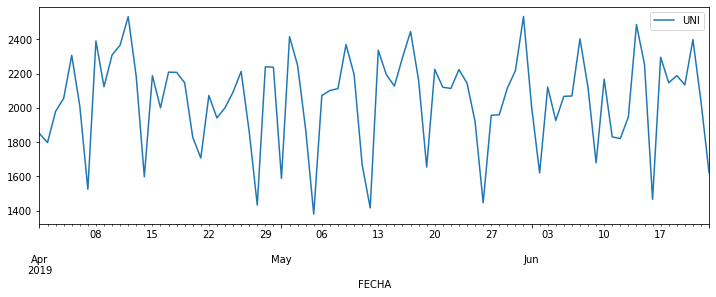

In [ ]:
bd_Ventas.resample("D", on = "FECHA").sum().plot(figsize=(12, 4))

In [ ]:
#bd_Ventas.UNI.groupby(bd_Ventas.FECHA.dt.isocalendar().day).sum().plot(kind='bar')

<Axes: xlabel='FECHA'>

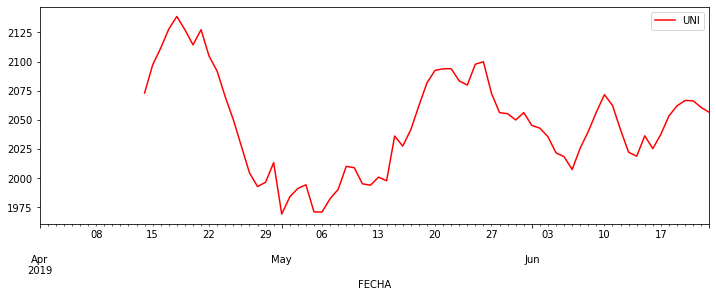

In [29]:
bd_Ventas.resample("D", on = "FECHA").sum().rolling(14).mean().plot(figsize=(12, 4),color='red')

<Axes: xlabel='FECHA'>

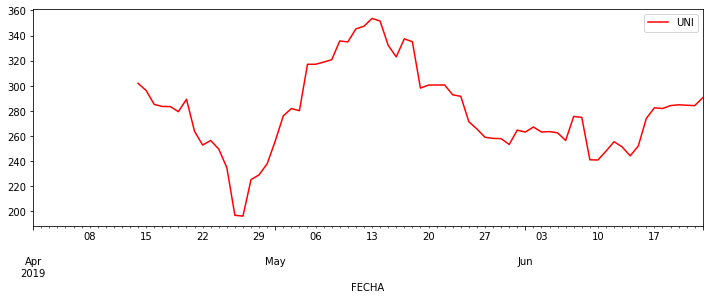

In [30]:
bd_Ventas.resample("D", on = "FECHA").sum().rolling(14).std().plot(figsize=(12, 4),color='red')

<Axes: xlabel='FECHA'>

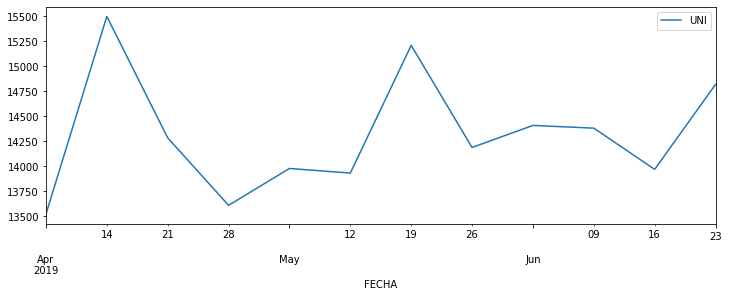

In [24]:
bd_Ventas.resample("W", on = "FECHA").sum().plot(figsize=(12, 4))

<Axes: xlabel='FECHA'>

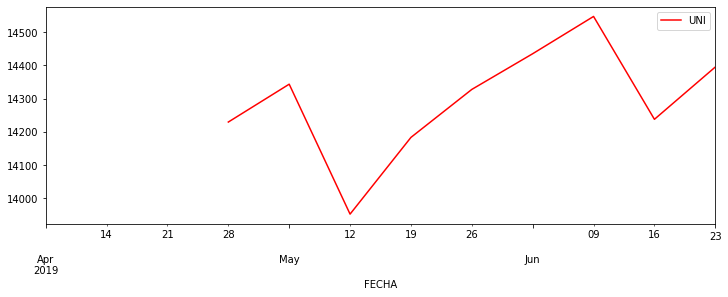

In [25]:
bd_Ventas.resample("W", on = "FECHA").sum().rolling(4).mean().plot(figsize=(12, 4),color='red')

<Axes: xlabel='FECHA'>

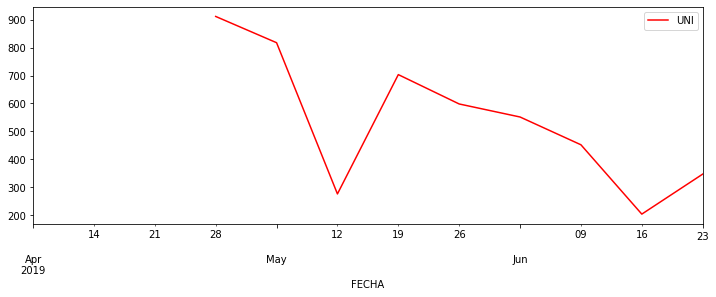

In [26]:
bd_Ventas.resample("W", on = "FECHA").sum().rolling(4).std().plot(figsize=(12, 4),color='red')

In [ ]:
#bd_Ventas.UNI.groupby(bd_Ventas.FECHA.dt.isocalendar().week).sum().plot(kind='bar')

### Ventas por Localidad

In [31]:
ventas_loc = bd_Ventas.pivot_table(columns="LOC", index = bd_Ventas.index, 
                        aggfunc=np.sum, fill_value=0)

ventas_loc.index = pd.DatetimeIndex(ventas_loc.index)

array([[<Axes: xlabel='FECHA'>, <Axes: xlabel='FECHA'>,
        <Axes: xlabel='FECHA'>, <Axes: xlabel='FECHA'>],
       [<Axes: xlabel='FECHA'>, <Axes: xlabel='FECHA'>,
        <Axes: xlabel='FECHA'>, <Axes: xlabel='FECHA'>],
       [<Axes: xlabel='FECHA'>, <Axes: xlabel='FECHA'>,
        <Axes: xlabel='FECHA'>, <Axes: xlabel='FECHA'>],
       [<Axes: xlabel='FECHA'>, <Axes: xlabel='FECHA'>,
        <Axes: xlabel='FECHA'>, <Axes: xlabel='FECHA'>],
       [<Axes: xlabel='FECHA'>, <Axes: xlabel='FECHA'>,
        <Axes: xlabel='FECHA'>, <Axes: xlabel='FECHA'>]], dtype=object)

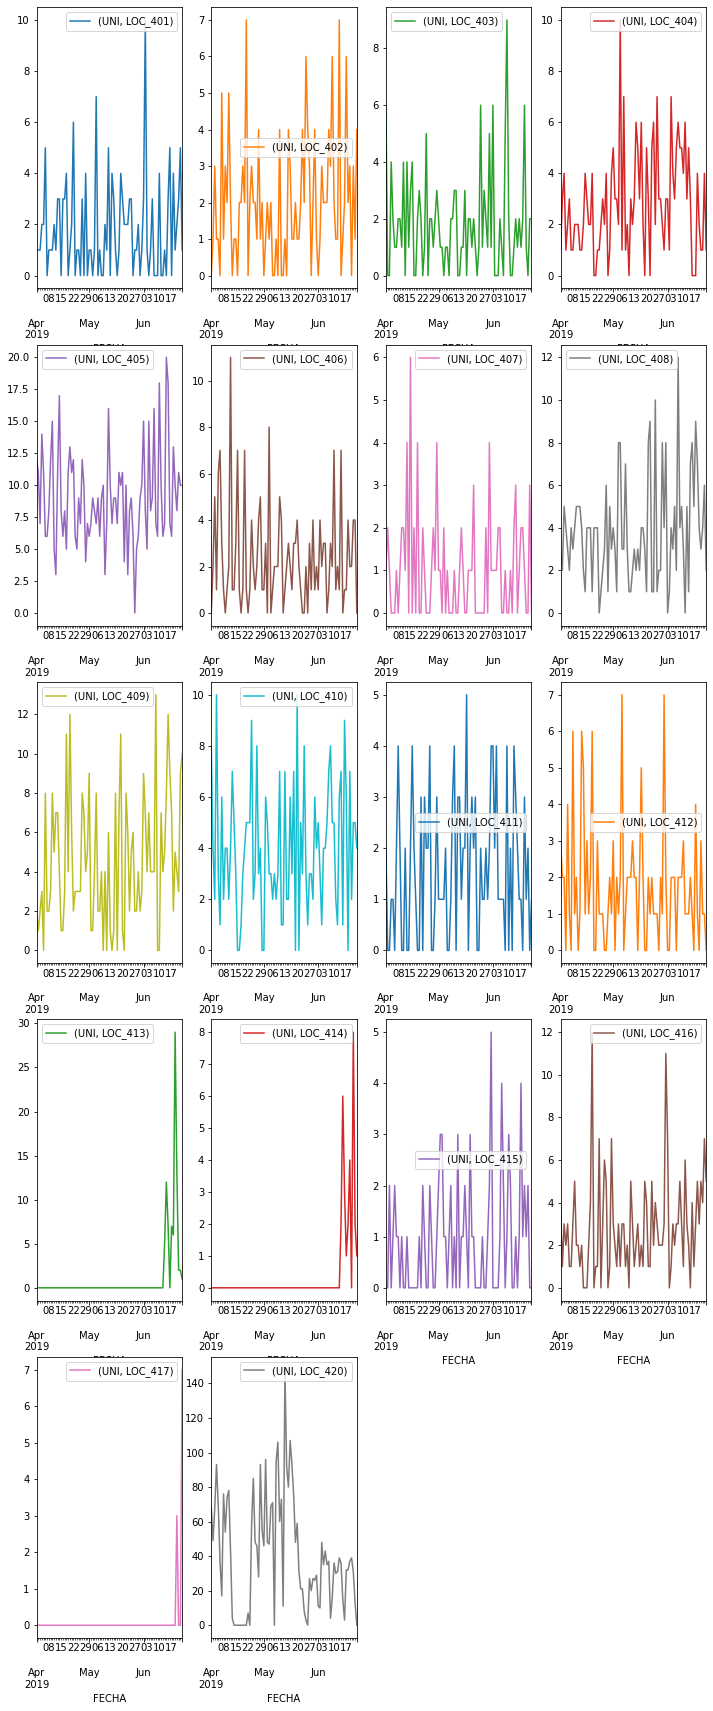

In [ ]:
ventas_loc.head(4)
ventas_loc.iloc[:,400:420].plot(figsize=(12, 30), subplots=True, layout=(-1, 4), sharex=False, sharey=False)

### Ventas por Producto

In [32]:
ventas_art = bd_Ventas.pivot_table(columns="SKU", index = bd_Ventas.index, 
                        aggfunc=np.sum, fill_value=0)
ventas_art.index = pd.DatetimeIndex(ventas_art.index)

In [61]:
ventas_dinero = (ventas_art*ganancia)

In [87]:
costo

array([ 5.44, 15.4 , 17.7 , 10.25, 16.35, 23.66, 22.19, 23.16, 10.85,
       20.52])

In [33]:
ventas_art.head(5)

UNI                                                      
SKU        Art01 Art02 Art03 Art04 Art05 Art06 Art07 Art08 Art09 Art10
FECHA                                                                 
2019-04-01   243   247   311   150   176   256   125    95   129   118
2019-04-02   285   208   271   156   144   245   116    98   146   128
2019-04-03   238   264   312   157   187   291   131   123   160   116
2019-04-04   261   280   304   174   216   287   127   111   139   156
2019-04-05   271   295   342   189   222   393   164   128   166   136

In [62]:
ventas_dinero

UNI                                                      \
SKU          Art01    Art02    Art03    Art04   Art05    Art06   Art07   
FECHA                                                                    
2019-04-01  566.19  2536.69  2963.83  1536.00  1232.0  1515.52   925.0   
2019-04-02  664.05  2136.16  2582.63  1597.44  1008.0  1450.40   858.4   
2019-04-03  554.54  2711.28  2973.36  1607.68  1309.0  1722.72   969.4   
2019-04-04  608.13  2875.60  2897.12  1781.76  1512.0  1699.04   939.8   
2019-04-05  631.43  3029.65  3259.26  1935.36  1554.0  2326.56  1213.6   
...            ...      ...      ...      ...     ...      ...     ...   
2019-06-19  582.50  2998.84  3163.96  2375.68  1442.0  1924.00   976.8   
2019-06-20  577.84  2813.98  2925.71  2140.16  1365.0  1959.52  1117.4   
2019-06-21  598.81  3368.56  3335.50  2058.24  1960.0  2291.04  1354.2   
2019-06-22  701.33  2742.09  2477.80  1822.72  1099.0  1805.60  1154.4   
2019-06-23  638.42  1930.76  2058.48  1443.84   812.0  1468.16   954.6   

                                      
SKU           Art08    Art09   Art10  
FECHA                                 
2019-04-01  1184.65   932.67  1038.4  
2019-04-02  1222.06  1055.58  1126.4  
2019-04-03  1533.81  1156.80  1020.8  
2019-04-04  1384.17  1004.97  1372.8  
2019-04-05  1596.16  1200.18  1196.8  
...             ...      ...     ...  
2019-06-19  1658.51  1033.89  1258.4  
2019-06-20  1646.04  1019.43  1284.8  
2019-06-21  1882.97  1127.88   924.0  
2019-06-22  1932.85  1113.42   915.2  
2019-06-23  1421.58   838.68   695.2  

[84 rows x 10 columns]

In [ ]:
ventas_art.plot(figsize=(12, 30), subplots=True, layout=(-1, 2), sharex=False, sharey=False)

<ipython-input-73-a5abe5f5614c>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  ventas_art.groupby(ventas_art.index.week).sum().plot(figsize=(10, 6))


<Axes: xlabel='FECHA'>

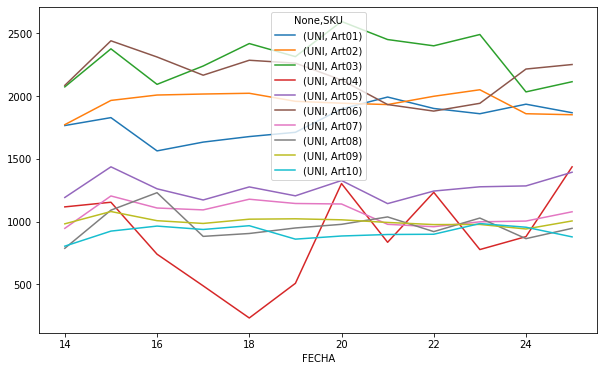

In [73]:
ventas_art.groupby(ventas_art.index.week).sum().plot(figsize=(10, 6))

In [ ]:
ventas_dinero.plot(figsize=(12, 30), subplots=True, layout=(-1, 2), sharex=False, sharey=False)

<ipython-input-74-50d7983151e7>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  ventas_dinero.groupby(ventas_art.index.week).sum().plot(figsize=(10, 6))


<Axes: xlabel='FECHA'>

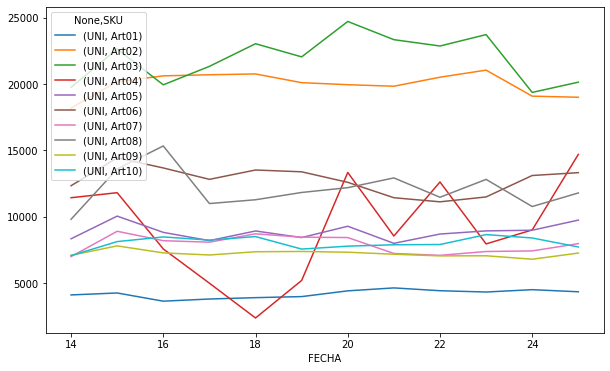

In [74]:
ventas_dinero.groupby(ventas_art.index.week).sum().plot(figsize=(10, 6))

<ipython-input-67-5bbbed8c45e4>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  ventas_dinero.sum(axis=1).groupby(ventas_art.index.week).sum().plot()


<Axes: xlabel='FECHA'>

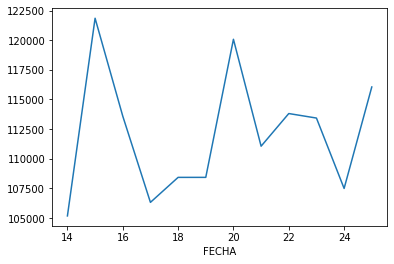

In [67]:
ventas_dinero.sum(axis=1).groupby(ventas_art.index.week).sum().plot()

<ipython-input-68-3f6fa74fed7e>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  ventas_dinero.sum(axis=1).groupby(ventas_art.index.week).sum().cumsum().plot()


<Axes: xlabel='FECHA'>

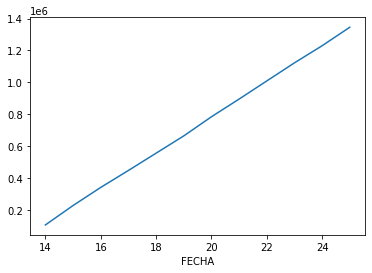

In [68]:
ventas_dinero.sum(axis=1).groupby(ventas_art.index.week).sum().cumsum().plot()

## Clustering

In [ ]:
'''df_1 = ventas_art.groupby(ventas_art.index.isocalendar().week).sum()/ventas_art.sum().values
df_2 = ventas_art.groupby(ventas_art.index.isocalendar().day).sum()/ventas_art.sum().values
df_2.index = ['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']
bd = pd.concat([df_1, df_2], axis=0).T
bd['Total'] = ventas_art.sum().values
bd['Media'] = ventas_art.mean().values
bd['Media_sup'] = ((ventas_art>ventas_art.mean().values).sum()/len(ventas_art)).values

bd.columns =  np.array(bd.columns,dtype=str)
matrix= pd.DataFrame(scaller.fit_transform(bd.values),columns=bd.columns)
matrix['ART']= [1,2,3,4,5,6,7,8,9,10
'''

In [51]:
!pip install tslearn

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()

In [53]:
from sklearn.cluster import AgglomerativeClustering as AC
from sklearn.preprocessing import StandardScaler
from tslearn.clustering import TimeSeriesKMeans, KShape, silhouette_score

In [54]:
def scale_df(df,axis=0):
    '''
    A utility function to scale numerical values (z-scale) to have a mean of zero
    and a unit variance.
    '''
    return (df - df.mean(axis=axis)) / df.std(axis=axis)

def plot_hmap(df, ix=None, cmap='bwr'):
    '''
    A function to plot heatmaps that show temporal patterns
    '''
    if ix is None:
        ix = np.arange(df.shape[0])
    plt.imshow(df.iloc[ix,:], cmap=cmap)
    plt.colorbar(fraction=0.03)
    plt.yticks(np.arange(df.shape[0]), df.index[ix])
    plt.xticks(np.arange(df.shape[1]))
    plt.grid(False)
    plt.show()
    
def scale_and_plot(df, ix = None):
    '''
    A wrapper function to calculate the scaled values within each row of df and plot_hmap
    '''
    df_marginal_scaled = scale_df(df.T).T
    if ix is None:
        ix = AC(4).fit(df_marginal_scaled).labels_.argsort() # a trick to make better heatmaps
    cap = np.min([np.max(df_marginal_scaled), np.abs(np.min(df_marginal_scaled))])
    df_marginal_scaled = np.clip(df_marginal_scaled, -1*cap, cap)
    plot_hmap(df_marginal_scaled, ix=ix)

<ipython-input-75-65215caa6172>:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  scale_and_plot(ventas_dinero.groupby(ventas_art.index.week).sum())
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


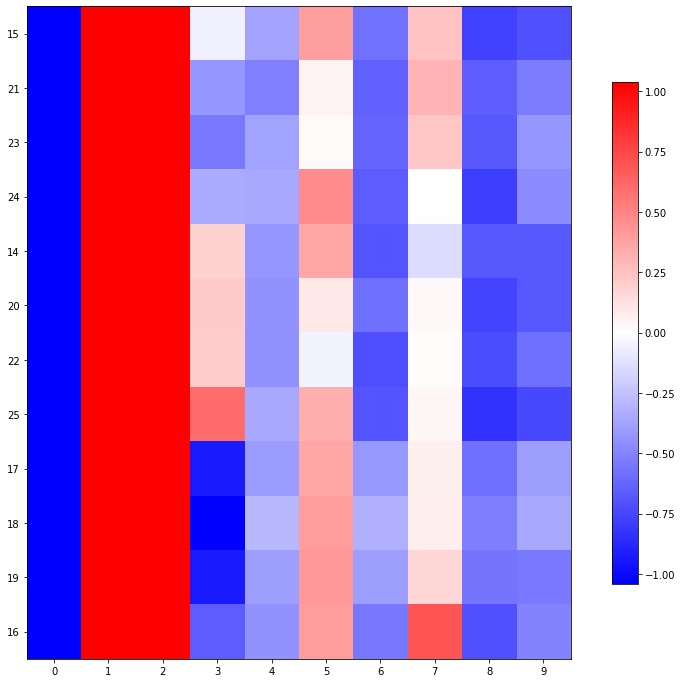

In [75]:
plt.figure(figsize=(15,12))
scale_and_plot(ventas_dinero.groupby(ventas_art.index.week).sum())

In [85]:
km_euc = TimeSeriesKMeans(n_clusters=2, 
                          verbose=2, 
                          n_init=10, 
                          metric="euclidean").fit(ventas_dinero.groupby(ventas_art.index.week).sum().transpose())
labels_euc = km_euc.labels_
print(silhouette_score(ventas_art.transpose(), labels_euc, metric="euclidean"))
print(labels_euc)

<ipython-input-85-4d396bb96104>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  metric="euclidean").fit(ventas_dinero.groupby(ventas_art.index.week).sum().transpose())


Init 1
247743506.537 --> 82456263.934 --> 82456263.934 --> 
Init 2
184268822.470 --> 82456263.934 --> 82456263.934 --> 
Init 3
97987579.330 --> 82456263.934 --> 82456263.934 --> 
Init 4
111278136.816 --> 82456263.934 --> 82456263.934 --> 
Init 5
247743506.537 --> 82456263.934 --> 82456263.934 --> 
Init 6
96556508.010 --> 82456263.934 --> 82456263.934 --> 
Init 7
213766179.936 --> 127690434.631 --> 127690434.631 --> 
Init 8
111278136.816 --> 82456263.934 --> 82456263.934 --> 
Init 9
184268822.470 --> 82456263.934 --> 82456263.934 --> 
Init 10
247743506.537 --> 82456263.934 --> 82456263.934 --> 
0.3234580754964045
[0 1 1 0 0 0 0 0 0 0]


array([[<Axes: xlabel='FECHA'>, <Axes: xlabel='FECHA'>,
        <Axes: xlabel='FECHA'>, <Axes: xlabel='FECHA'>],
       [<Axes: xlabel='FECHA'>, <Axes: xlabel='FECHA'>,
        <Axes: xlabel='FECHA'>, <Axes: xlabel='FECHA'>]], dtype=object)

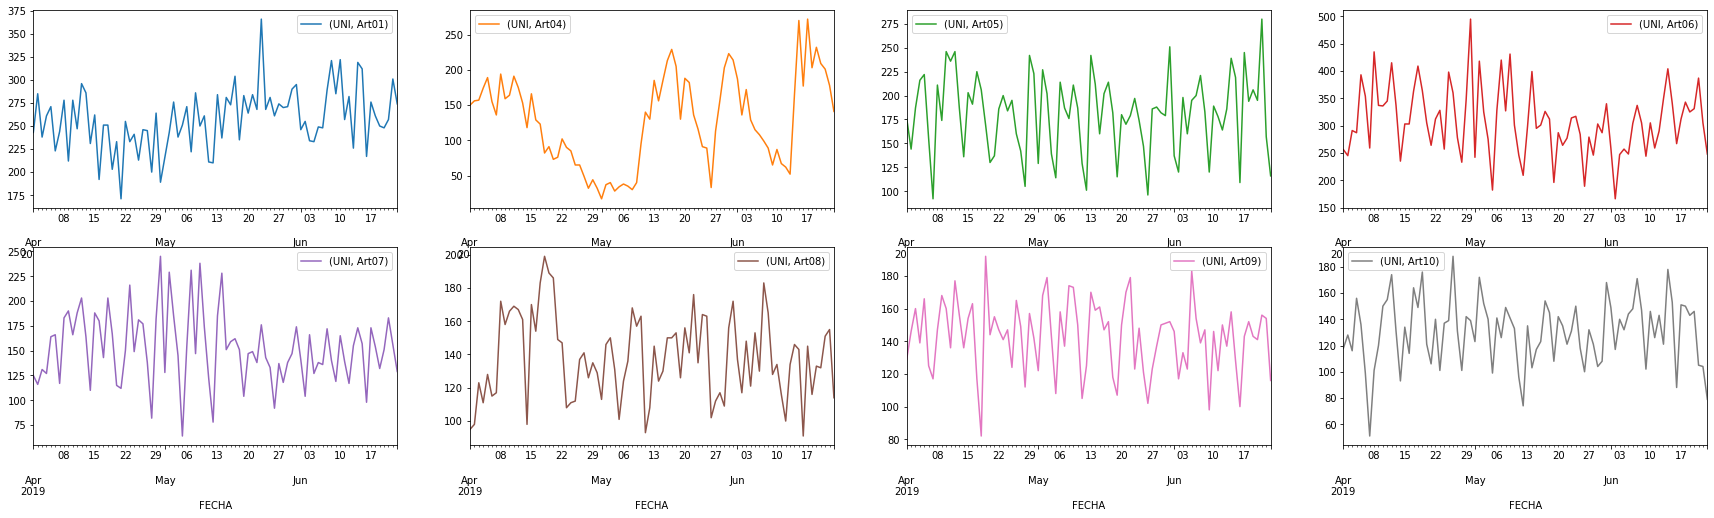

In [82]:
ventas_art.iloc[:,labels_euc==0].plot(figsize=(30, 8), subplots=True, layout=(-1, 4), sharex=False, sharey=False)

array([[<Axes: xlabel='FECHA'>, <Axes: xlabel='FECHA'>,
        <Axes: xlabel='FECHA'>, <Axes: xlabel='FECHA'>]], dtype=object)

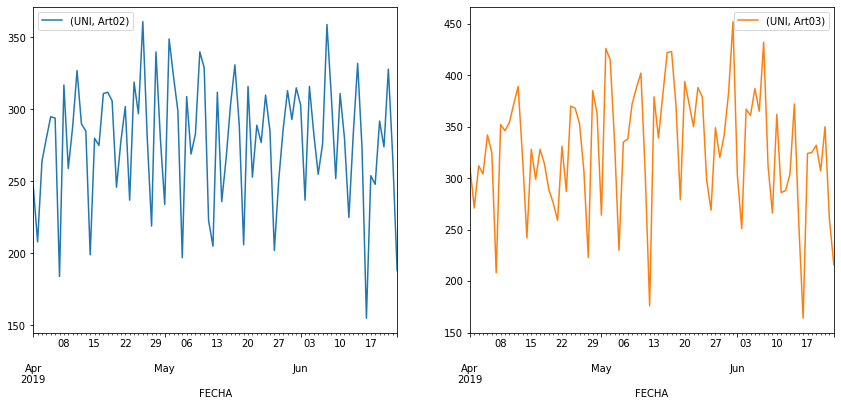

In [83]:
ventas_art.iloc[:,labels_euc==1].plot(figsize=(30, 6), subplots=True, layout=(-1, 4), sharex=False, sharey=False)

## VENTAS-LOCACIONES

In [8]:
ventas = bd_Ventas.pivot_table(columns=["SKU","LOC"], index = bd_Ventas.index.to_period('W'), 
                        aggfunc=np.sum, fill_value=0)

In [ ]:
axu = []
for aux in ventas.UNI.columns:
  axu.append(aux[0]=='Art01')

In [ ]:
ventas.loc[:,axu].plot(figsize=(12, 30), subplots=True, layout=(-1, 2), sharex=False, sharey=False)

In [ ]:
ventas = bd_Ventas.pivot_table(columns=["LOC","SKU"], index = bd_Ventas.index.to_period('W'), 
                        aggfunc=np.sum, fill_value=0)

In [ ]:
axu = []
for aux in ventas.UNI.columns:
  axu.append(aux[0]=='LOC_001')

In [ ]:
ventas.loc[:,axu].plot(figsize=(12, 10), subplots=True, layout=(-1, 2), sharex=False, sharey=False)

# Generación de inventarios

In [21]:
retail = bd_Ventas.pivot_table(columns=["SKU","LOC"], index = bd_Ventas.index.to_period('W'), 
                        aggfunc=np.sum, fill_value=0)

art = []
loc = []
for aux in retail.columns:
  art.append(aux[1])
  loc.append(aux[2])

ventas = bd_Ventas[bd_Ventas.index>='2019-04-08']

## Ideal

In [22]:
inventario = pd.concat([pd.DataFrame([art,loc]).T, pd.DataFrame(retail.values).T.iloc[:,1:]], axis=1)

In [23]:
G,M = WinLose(ventas,inventario)

2019-04-08T00:00:00.000000000
18747.3
0.0
#############################
2019-04-09T00:00:00.000000000
35686.67
0.0
#############################
2019-04-10T00:00:00.000000000
53831.49
0.0
#############################
2019-04-11T00:00:00.000000000
72806.6
0.0
#############################
2019-04-12T00:00:00.000000000
92548.15
0.0
#############################
2019-04-13T00:00:00.000000000
109573.32
0.0
#############################
2019-04-14T00:00:00.000000000
121850.8
0.0
#############################
2019-04-15T00:00:00.000000000
139181.02
0.0
#############################
2019-04-16T00:00:00.000000000
155187.89
0.0
#############################
2019-04-17T00:00:00.000000000
172705.33
0.0
#############################
2019-04-18T00:00:00.000000000
190077.57
0.0
#############################
2019-04-19T00:00:00.000000000
207246.66
0.0
#############################
2019-04-20T00:00:00.000000000
221685.71
0.0
#############################
2019-04-21T00:00:00.000000000
235447.87
0.0
##

<Axes: >

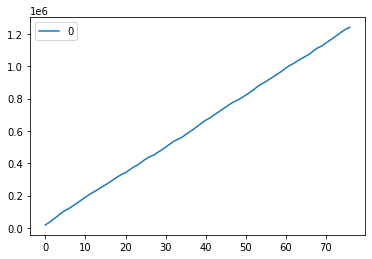

In [ ]:
pd.DataFrame(G).plot()

<Axes: >

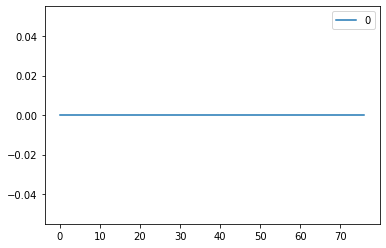

In [ ]:
pd.DataFrame(M).plot()

## Simple moving average

In [ ]:
m_a = retail.T.rolling(window = 2,axis=1).mean()
inv_ideal = pd.DataFrame(np.array(m_a.iloc[:,1:].values, dtype='int'))
inventario = pd.concat([pd.DataFrame([art,loc]).T, inv_ideal], axis=1)

In [ ]:
G,M = WinLose(ventas,inventario)

2019-04-08T00:00:00.000000000
18230.93
0.0
#############################
2019-04-09T00:00:00.000000000
34508.49
0.0
#############################
2019-04-10T00:00:00.000000000
51440.12
0.0
#############################
2019-04-11T00:00:00.000000000
67989.72
0.0
#############################
2019-04-12T00:00:00.000000000
82918.9
0.0
#############################
2019-04-13T00:00:00.000000000
92944.03
0.0
#############################
2019-04-14T00:00:00.000000000
98102.17
1168.5
#############################
2019-04-15T00:00:00.000000000
115102.38
1168.5
#############################
2019-04-16T00:00:00.000000000
130538.88
1168.5
#############################
2019-04-17T00:00:00.000000000
147139.82
3572.7
#############################
2019-04-18T00:00:00.000000000
163290.87
3572.7
#############################
2019-04-19T00:00:00.000000000
177332.1
4245.82
#############################
2019-04-20T00:00:00.000000000
187350.27
4245.82
#############################
2019-04-21T00:00:00.0000

<Axes: >

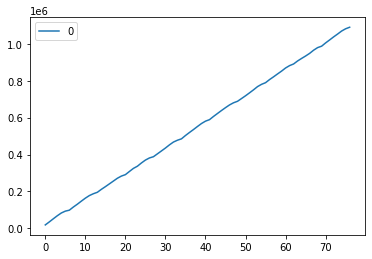

In [ ]:
pd.DataFrame(G).plot()

<Axes: >

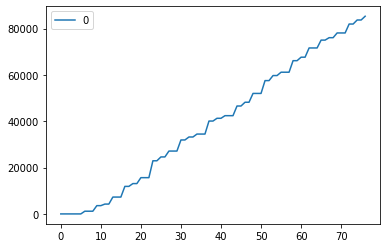

In [ ]:
pd.DataFrame(M).plot()

## Simple exponential smoothing

In [ ]:
retail = bd_Ventas.pivot_table(columns=["SKU","LOC"], index = bd_Ventas.index.to_period('D'), 
                        aggfunc=np.sum, fill_value=0)

art = []
loc = []
for aux in retail.columns:
  art.append(aux[1])
  loc.append(aux[2])

ventas = bd_Ventas[bd_Ventas.index>='2019-04-08']

In [ ]:
e_s = retail.T.ewm(alpha=0.5,adjust=False).mean().T
inv_ideal = pd.DataFrame(np.array(e_s.groupby([retail.index.week]).sum().values, dtype='int'))
inventario = pd.concat([pd.DataFrame([art,loc]).T, inv_ideal.T], axis=1)

In [ ]:
G,M = WinLose(ventas,inventario)

2019-04-08T00:00:00.000000000
17003.39
0.0
#############################
2019-04-09T00:00:00.000000000
31120.3
0.0
#############################
2019-04-10T00:00:00.000000000
43623.63
0.0
#############################
2019-04-11T00:00:00.000000000
53604.01
0.0
#############################
2019-04-12T00:00:00.000000000
61285.22
0.0
#############################
2019-04-13T00:00:00.000000000
66574.1
0.0
#############################
2019-04-14T00:00:00.000000000
69591.02
2736.75
#############################
2019-04-15T00:00:00.000000000
86096.3
2736.75
#############################
2019-04-16T00:00:00.000000000
100474.26
2736.75
#############################
2019-04-17T00:00:00.000000000
114304.32
13515.43
#############################
2019-04-18T00:00:00.000000000
126029.81
13515.43
#############################
2019-04-19T00:00:00.000000000
135104.41
19245.41
#############################
2019-04-20T00:00:00.000000000
141188.45
19245.41
#############################
2019-04-21T00:00:

<Axes: >

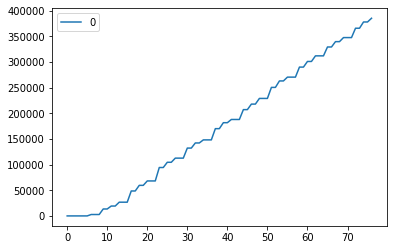

In [ ]:
pd.DataFrame(M).plot()

<Axes: >

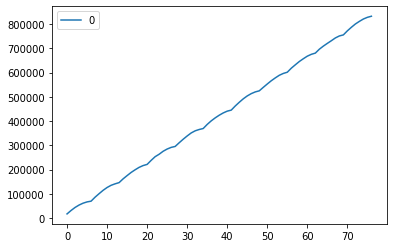

In [ ]:
pd.DataFrame(G).plot()

## Holt's model

## Winter's model

# Función de Ganancia-Perdida

In [13]:
def indices(cell):
  return int(cell[1][-3:])-1,int(cell[0][-2:])-1,cell[-1]

In [15]:
def Merma(i,j,t_n,M,num_prod,time_prod):
   n = len(time_prod[i][j])
   if t_n[0]==0:                                            #Revisamos si el producto caduco
            #Pzs_merma[i][j] = np.round(Pzs_merma[i][j] +costo[j]*num_prod[i][j],2)
            M = np.round(M + costo[j]*num_prod[i][j][0],2)      #Calculamos la merma
            if (n==1):      
                  time_prod[i][j][0]=0
                  num_prod[i][j][0]=0              
            else:
                  time_prod[i][j].pop(0)
                  num_prod[i][j].pop(0)  
                  M = Merma(i,j,t_n[1:],M,num_prod,time_prod)
   else:
            time_prod[i][j] = list(t_n)                          #Actualizamos tiempo de frescura
   return M

In [16]:
def Lucro(i,j,p_n,G,num_prod,time_prod):
   p_ = num_prod[i][j][0]-p_n
   if p_>0:  
        num_prod[i][j][0] = p_
        #G =  G+ np.round(ganancia[j]*float(p_n),2)
        #Pzs_lucro[i][j] = np.round(Pzs_lucro[i][j] +ganancia[j]*p_n,2)  
        G =  G + ganancia[j]*p_n 
   else:
        #G =  G+np.round(ganancia[j]*float(num_prod[i][j][0]),2) 
        #Pzs_lucro[i][j] = np.round(Pzs_lucro[i][j] + ganancia[j]*num_prod[i][j][0] ,2)   
        G =  G + ganancia[j]*num_prod[i][j][0]  
        n = len(num_prod[i][j])
        if n>1:                 
                  num_prod[i][j].pop(0)
                  time_prod[i][j].pop(0)
                  G = Lucro(i,j,-p_,G,num_prod,time_prod)               
        else:               
                  num_prod[i][j][0] = 0
                  time_prod[i][j][0] = 0                  
   return np.round(G,2)  

In [17]:
def WinLose(ventas,inventario):
  G = 0.0
  M = 0.0
  W = 0
  G_t = []
  M_t = []
  num_prod = [[[0] for col in range(10)] for row in range(420)]
  time_prod = [[[0] for col in range(10)] for row in range(420)]
  Pzs_merma = [[0 for col in range(10)] for row in range(420)]
  Pzs_lucro = [[0 for col in range(10)] for row in range(420)]

  with open("ganancia.pickle", "rb") as fp:   
      ganancia = pickle.load(fp)
  with open("costo.pickle", "rb") as fp:   
      costo = pickle.load(fp)
  with open("vida.pickle", "rb") as fp:   
      vida = pickle.load(fp)

  for t in np.unique(ventas.FECHA):
    print(t)
    if pd.Series(t).dt.isocalendar().day[0]==1:
        #Actualizar el inventario y tiempos
        for aux in inventario.iloc[:,[0,1,2+W]].values:
                i,j,uni = indices(aux)
                if num_prod[i][j][0]==0:
                    num_prod[i][j][0] = uni
                    time_prod[i][j][0] = vida[j]
                else:
                    num_prod[i][j].append(uni)
                    time_prod[i][j].append(vida[j])
        W = W + 1
  
    query = np.where(ventas.FECHA==t)[0]
    if len(query)!=0:
        #Actualizamos el inventario y calculamos ganancia
        for aux in ventas.iloc[query].values:              
              i,j,uni = indices(aux)
              G = Lucro(i,j,aux[3],G,num_prod,time_prod)
    
    #Actulizamos tiempos y calculamos merma
    for i in range(420):
      for j in range(10):
        if num_prod[i][j][0] != 0: 
          n = len(time_prod[i][j])                               #Analizar si hay producto en inventario
          t_ = time_prod[i][j]-np.repeat(1,n)                     #Restamos un dia al tiempo de frescura
          M = Merma(i,j,t_,M,num_prod,time_prod)
    G_t.append(G)
    M_t.append(M)

    print(G)
    print(M)
    print("#############################")

  return G_t,M_t

In [ ]:
'''with open('ganancia.pickle', 'wb') as pkl:
    pickle.dump(ganancia, pkl)
with open('costo.pickle', 'wb') as pkl:
    pickle.dump(costo, pkl)
with open('vida.pickle', 'wb') as pkl:
    pickle.dump(vida, pkl)'''
#inventario.to_csv('Inventario.csv',index = False)

# Pruebas

In [ ]:
G = 0.0
M = 0.0
W = 0
G_t = []
M_t = []

In [ ]:
num_prod = [[[0] for col in range(10)] for row in range(420)]
time_prod = [[[0] for col in range(10)] for row in range(420)]
Pzs_merma = [[0 for col in range(10)] for row in range(420)]
Pzs_lucro = [[0 for col in range(10)] for row in range(420)]

with open("ganancia.pickle", "rb") as fp:   
    ganancia = pickle.load(fp)
with open("costo.pickle", "rb") as fp:   
    costo = pickle.load(fp)
with open("vida.pickle", "rb") as fp:   
    vida = pickle.load(fp)

ventas = pd.read_excel('BaseDatos.xlsx',sheet_name= 1)
inventario = pd.read_csv('Inventario.csv')

In [ ]:
for t in np.unique(ventas.FECHA):
  if pd.Series(t).dt.isocalendar().day[0]==1:
      #Actualizar el inventario y tiempos
      for aux in inventario.iloc[:,[0,1,2+W]].values:
              i,j,uni = indices(aux)
              if num_prod[i][j][0]==0:
                  num_prod[i][j][0] = uni
                  time_prod[i][j][0] = vida[j]
              else:
                  num_prod[i][j].append(uni)
                  time_prod[i][j].append(vida[j])
      W = W + 1
  
  query = np.where(ventas.FECHA==t)[0]
  if len(query)!=0:
      #Actualizamos el inventario y calculamos ganancia
      for aux in ventas.iloc[query].values:
            i,j,uni = indices(aux)
            G = Lucro(i,j,aux[3],G)
                             
  #Actulizamos tiempos y calculamos merma
  for i in range(420):
    for j in range(10):
      if num_prod[i][j][0] != 0:                                #Analizar si hay producto en inventario
        n = len(time_prod[i][j])
        t_ = time_prod[i][j]-np.repeat(1,n)                     #Restamos un dia al tiempo de frescura
        M = Merma(i,j,t_,M)
  G_t.append(G)
  M_t.append(M)

In [ ]:
pd.Series(G_t,index = np.unique(ventas.FECHA)).plot()
pd.Series(M_t,index = np.unique(ventas.FECHA)).plot()

In [ ]:
sns.heatmap(pd.DataFrame(Pzs_merma), annot=True)

In [ ]:
Pzs_lucro = pd.DataFrame(Pzs_lucro)
Mtx_st = (Pzs_lucro-Pzs_lucro.mean()) / Pzs_lucro.std()

In [ ]:
#sns.heatmap(Mtx_st, annot=True)

In [ ]:
#Mtx_st.iloc[400:,:]

In [ ]:
#plt.pcolor(Mtx_st.iloc[400:,:])

### Borrador : Funcion original

In [ ]:
G = 0.0
M = 0.0
W = 0
num_prod = [[[0] for col in range(10)] for row in range(420)]
time_prod = [[[0] for col in range(10)] for row in range(420)]

retail = bd_Ventas.pivot_table(columns=["SKU","LOC"], index = bd_Ventas.index.to_period('W'), 
                        aggfunc=np.sum, fill_value=0)
art = []
loc = []
for aux in retail.columns:
  art.append(aux[1])
  loc.append(aux[2])

inventario = pd.concat([pd.DataFrame([art,loc]).T, pd.DataFrame(retail.values).T], axis=1)
ventas = bd_Ventas

ganancia = np.round(bd_Catalogo.Precio.values-bd_Catalogo.Costo.values,2)
costo = bd_Catalogo.Costo.values
vida = bd_Catalogo.TiempoVidaAnaquel.values

for t in np.unique(ventas.FECHA):
  if pd.Series(t).dt.isocalendar().day[0]==1:
      #Actualizar el inventario y tiempos
      for aux in inventario.iloc[:,[0,1,2+W]].values:
              i,j,uni = indices(aux)
              if num_prod[i][j][0]==0:
                if uni!=0:
                  num_prod[i][j][0] = uni
                  time_prod[i][j][0] = vida[j]
              else:
                if uni!=0:
                  num_prod[i][j].append(uni)
                  time_prod[i][j].append(vida[j])
      W = W + 1
  
  query = np.where(ventas.FECHA==t)[0]
  if len(query)!=0:
      #Actualizamos el inventario y calculamos ganancia
      for aux in ventas.iloc[query].values:
            i,j,uni = indices(aux)
            n_ = num_prod[i][j][0]-aux[3]
            if n_>0:  
                num_prod[i][j][0] = n_
                G =  np.round(G+ganancia[j]*float(aux[3]),2)       
            else:
                if(len(num_prod[i][j])==1):
                    num_prod[i][j][0] = 0
                    G =  np.round(G+ganancia[j]*float(aux[3]+n_),2)
                    time_prod[i][j][0] = 0
                else:
                    num_prod[i][j].pop(0)
                    G =  np.round(G+ganancia[j]*float(aux[3]+n_),2)
                    time_prod[i][j].pop(0)
                   
  #Actulizamos tiempos y calculamos merma
  for i in range(420):
    for j in range(10):
        if num_prod[i][j][0] != 0 and time_prod[i][j][0] != 0:
            t_ = time_prod[i][j]-np.repeat(1,len(time_prod[i][j]))
            if t_[0]==0:
                M = np.round(M + costo[j]*num_prod[i][j][0],2)
                if len(time_prod[i][j])==1:
                  time_prod[i][j][0]=0
                  num_prod[i][j][0]=0
                else:
                  time_prod[i][j].pop(0)
                  num_prod[i][j].pop(0)         
            else:
                time_prod[i][j] = list(t_)

  #print(num_prod[0:4])
  #print(time_prod[0:4])
  print(G)
  print(M)
  print("#############################")

In [ ]:
'''for t in np.unique(ventas.FECHA):
  if pd.Series(t).dt.isocalendar().day[0]==1:
      #Actualizar el inventario y tiempos
      for aux in inventario.iloc[:,[0,1,2+W]].values:
              if num_prod[int(aux[1][-3:])-1][int(aux[0][-2:])-1][0]==0:
                num_prod[int(aux[1][-3:])-1][int(aux[0][-2:])-1][0] = aux[2]
                if aux[2]!=0:
                  time_prod[int(aux[1][-3:])-1][int(aux[0][-2:])-1][0] = vida[int(aux[0][-2:])-1]
              else:
                if aux[2]!=0:
                  num_prod[int(aux[1][-3:])-1][int(aux[0][-2:])-1].append(aux[2])
                  time_prod[int(aux[1][-3:])-1][int(aux[0][-2:])-1].append(vida[int(aux[0][-2:])-1])
      W = W + 1
  
  query = np.where(ventas.FECHA==t)[0]
  if len(query)!=0:
      #Actualizamos el inventario y calculamos ganancia
      for aux in ventas.iloc[query].values:
            n_ = num_prod[int(aux[1][-3:])-1][int(aux[0][-2:])-1][0]-aux[3]
            if n_>0:  
                num_prod[int(aux[1][-3:])-1][int(aux[0][-2:])-1][0] = n_
                G =  np.round(G+ganancia[int(aux[0][-2:])-1]*float(aux[3]),2)       
            else:
                if(len(num_prod[int(aux[1][-3:])-1][int(aux[0][-2:])-1])==1):
                    num_prod[int(aux[1][-3:])-1][int(aux[0][-2:])-1][0] = 0
                    G =  np.round(G+ganancia[int(aux[0][-2:])-1]*float(aux[3]+n_),2)
                    time_prod[int(aux[1][-3:])-1][int(aux[0][-2:])-1][0] = 0
                else:
                    num_prod[int(aux[1][-3:])-1][int(aux[0][-2:])-1].pop(0)
                    G =  np.round(G+ganancia[int(aux[0][-2:])-1]*float(aux[3]+n_),2)
                    time_prod[int(aux[1][-3:])-1][int(aux[0][-2:])-1].pop(0)

    
  #Actulizamos tiempos y calculamos merma
  for i in range(420):
    for j in range(10):
        if num_prod[i][j][0] != 0 and time_prod[i][j][0] != 0:
            t_ = time_prod[i][j]-np.repeat(1,len(time_prod[i][j]))
            if t_[0]==0:
                M = np.round(M + costo[j]*num_prod[i][j][0],2)
                if len(time_prod[i][j])==1:
                  time_prod[i][j][0]=0
                  num_prod[i][j][0]=0
                else:
                  time_prod[i][j].pop(0)
                  num_prod[i][j].pop(0)         
            else:
                time_prod[i][j] = list(t_)

     
  
  #print(num_prod[0:2])
  #print(time_prod[0:2])
  print(G)
  print(M)
  print("#############################")

In [ ]:
!pip install hierarchicalforecast statsforecast datasetsforecast

In [ ]:
# compute base forecast no coherent
from statsforecast.core import StatsForecast
from statsforecast.models import AutoARIMA, Naive

#obtain hierarchical reconciliation methods and evaluation
from hierarchicalforecast.core import HierarchicalReconciliation
from hierarchicalforecast.methods import BottomUp, TopDown, MiddleOut

#obtain hierarchical datasets
from datasetsforecast.hierarchical import HierarchicalData

In [ ]:
# Load TourismSmall dataset
Y_df, S, tags = HierarchicalData.load('./data', 'TourismSmall')

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
Y_df, S, tags = HierarchicalData.load('./data', 'TourismSmall')
Y_df['ds'] = pd.to_datetime(Y_df['ds'])


# Compute base level predictions 
sf = StatsForecast(df=Y_df, 
                   models=[AutoARIMA(season_length=12), Naive()], 
                   freq='M', n_jobs=-1)

forecasts_df = sf.forecast(h=12)

# Reconcile the base predictions
reconcilers = [
    BottomUp(),
    TopDown(method='forecast_proportions'),
    MiddleOut(middle_level='Country/Purpose/State',
              top_down_method='forecast_proportions')
]

hrec = HierarchicalReconciliation(reconcilers=reconcilers)

reconciled_forecasts = hrec.reconcile(Y_hat_df=forecasts_df, S=S, tags=tags)